## Exploratory Data Analysis on Heart Failure Data
#### Using basic EDA and modeling techniques to learn more about the heart failure and how to help patients with heart disease

Table of Contents
1. [Information About Dataset](#Data_Info)
2. [Checking Distributions of Columns](#Distribution)
3. [Feature Correlation with a heatmap](#Heatmap)
4. [Discussion about data](#Discussion)
5. [Boxplots](#boxplots)
6. [Predictive Modeling](#modeling)
7. [Modeling Discussion](#modeling_future)

<a id='Data_Info'></a>
## Data Info:

Data Source: [Kaggle: Heart Failure Prediction](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data) 

**age:** Age in years of patient  
**anaemia:** Decrease of red blood cells or hemoglobin (boolean)  
**creatinine_phosphokinase:** level of the CPK enzyme in the blood (mcg/L)  
**diabetes:** Diabetes Status of patient (boolean)  
**ejection_fraction:** Percentage of blood leaving the heart at each contraction (percentage)  
**high_blood_pressure:** hypertension status (boolean)  
**platelets:** Platelets in the blood (kiloplatelets/mL)  
**serum_creatinine:** Level of serum creatinine in the blood (mEq/L)  
**serum_sodium:** Level of serum sodium in the blood (mEq/L)  
**sex:** Woman or Man (Binary)  
**smoking:** Does patient smoke or not (boolean)  
**time:** Follow-up period (days)  
**DEATH_EVENT:** If the patient deceased during the follow-up period (boolean)  

In [303]:
import numpy as np 
import pandas as pd # need to deal with dataframes
import matplotlib.pyplot as plt # need for plots/data viz
from matplotlib import pyplot # need for plots/data viz
import seaborn as sns # need for plots/data viz

In [304]:
data = pd.read_csv("/Users/ashvath/Downloads/datasets_727551_1263738_heart_failure_clinical_records_dataset.csv")

In [305]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Check to see how many Null values we have

In [306]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<a id='Distribution'></a>
## Get a visual representation of all our columns  
#### This will help reveal if there are any errors in our data that need to fixed

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'anaemia'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'ejection_fraction'}>,
        <AxesSubplot:title={'center':'high_blood_pressure'}>,
        <AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>],
       [<AxesSubplot:title={'center':'serum_sodium'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'DEATH_EVENT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

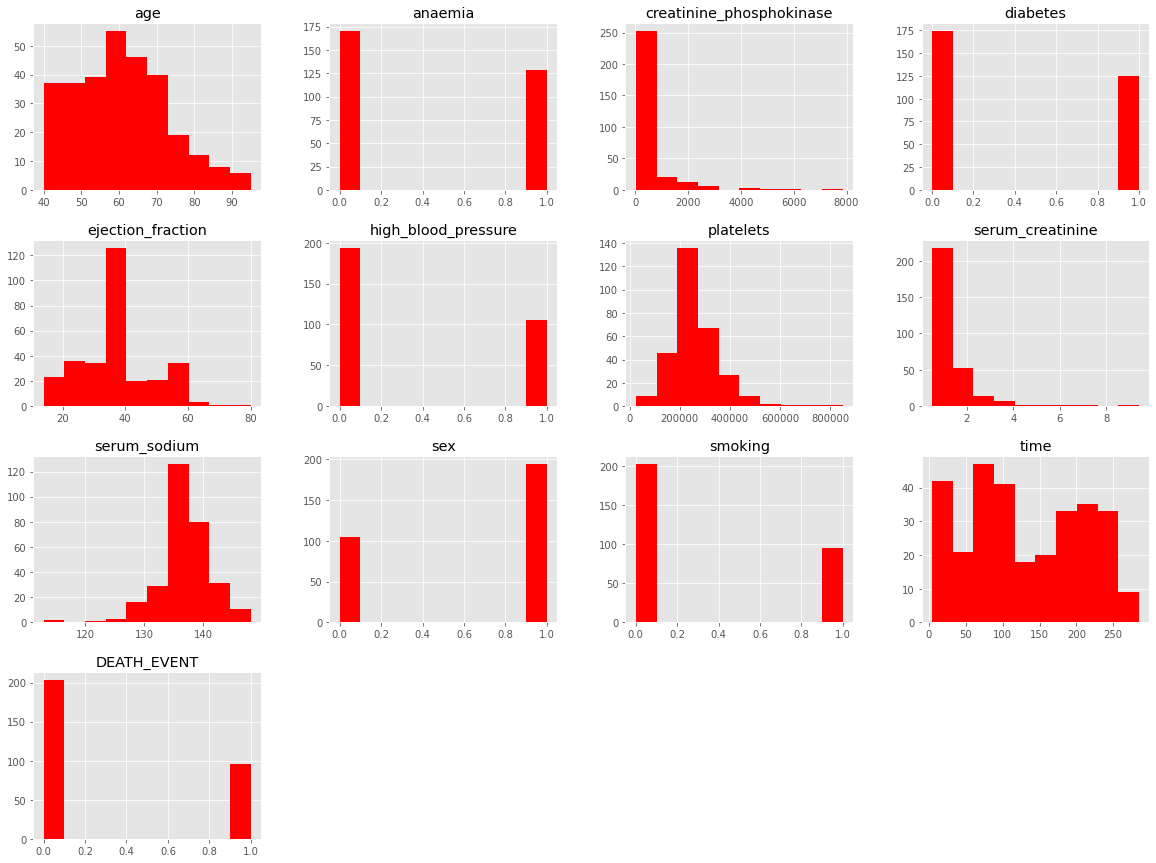

In [307]:
data.hist(figsize=(20,15), color="red")

#### Our data is very clean and it doesn't seem like there are any errors such as missing values, or huge ourliers

<a id='Heatmap'></a>
## Correlation Heatmap
#### We'll use a heat map to get a clear picture of correlation values between features

<AxesSubplot:>

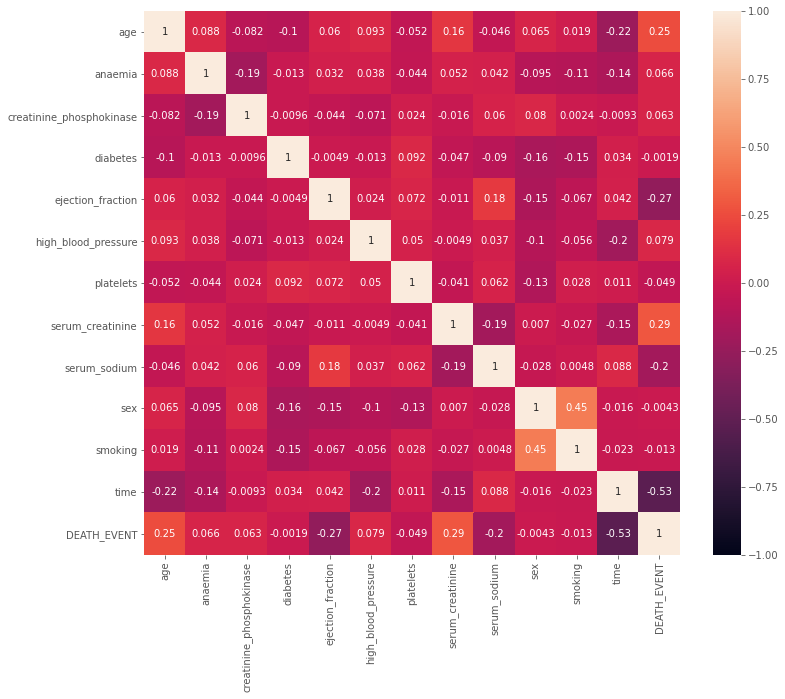

In [308]:
corr = data.corr()
pyplot.figure(figsize = (12,10))
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            annot=True,
            xticklabels=corr.columns,
            yticklabels=corr.columns)

<a id='Discussion'></a>
## It looks like age, ejection_fraction, serum_creatinine, and time are highly correlated with a death_event. 
 - age seems to be the most obvious in that the older a patient is the more likely they are to die due to their heart disease
 - ejection fraction is the percentage of blood leaving the heart every time it contracts
     - source: https://www.mayoclinic.org/ejection-fraction/expert-answers/faq-20058286
     - it seems that a lower ejection fraction is an indication of poor heart health
     - makes sense that there is a negative correlation between ejection fraction and a death event
 - creatinine is a by product of muscle metabolism and is filtered out of the body in patients with healthy hearts
     - source: https://www.mayoclinic.org/tests-procedures/creatinine-test/about/pac-20384646
     - a higher creatinine level indicates poor kidney function
     - makes sense that creatinine levels and patient death are positively correlated
         - poor kidney health may result in poor overall health and heart health
 - the time feature seems to be decided by the physician(s) that work with the patient
     - Seems to be time between the diagnosis of heart issues and the next appointment
         - unsure if a death event is considered as a follow-up meeting
     - makes sense that people who are at less risk of death for various reasons such as better health/younger age
       are given longer periods of time for their next appointment
     - we can see that a longer follow-up time is given to people with a larger ejection fraction and lower serum 
       creatinine which follows earlier logic

<a id='boxplots'><a>
## Examine distributions using boxplots
#### Want to get a better look of distribution of certain features

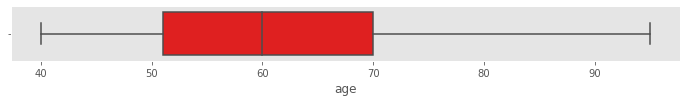

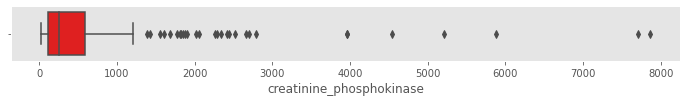

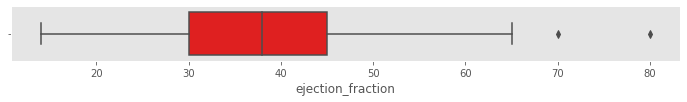

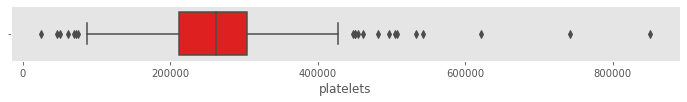

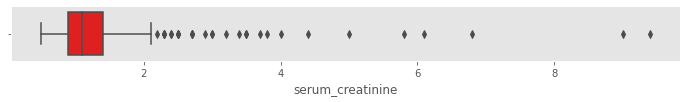

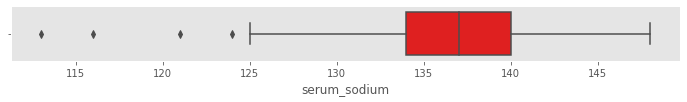

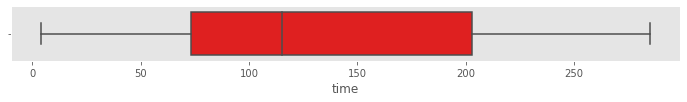

In [309]:
plt.rcParams["figure.figsize"] = 12,1


sns.boxplot(x = data["age"], color="red")
plt.grid(False)
plt.show()

sns.boxplot(x=data["creatinine_phosphokinase"], color="red")
plt.grid(False)
plt.show()

sns.boxplot(x=data["ejection_fraction"], color="red")
plt.grid(False)
plt.show()

sns.boxplot(x=data["platelets"], color="red")
plt.grid(False)
plt.show()

sns.boxplot(x=data["serum_creatinine"], color="red")
plt.grid(False)
plt.show()

sns.boxplot(x=data["serum_sodium"], color="red")
plt.grid(False)
plt.show()

sns.boxplot(x=data["time"], color="red")
plt.grid(False)
plt.show()

<a id='modeling'></a>
## Modeling: Predicting time to next appointment and death outcome
 - I wanted to do some basic modeling just to see how our data performs
 - The two most obvious features to look at include time and death_event
     - someone looking at this data and utilizing it may want to know the ideal follow-up period
     - it would also be important to see if the data in this dataset could predict the death outcome of a patient

In [310]:
#drop the two columns we are trying to predict
fitData = data.drop(['time', 'DEATH_EVENT'], axis=1)

#store the labels in arrays
timeLabels = data['time']
deathLabels = data['DEATH_EVENT']

In [311]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

#isolate numerical data that needs to be standardized
#age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium

numData = fitData.drop(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'], axis=1)
numFeatures = list(numData)
print(numFeatures)

numPipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

fullPipeline = ColumnTransformer([
    ('num_Pipe', numPipeline, numFeatures)
], remainder='passthrough')

prepared_data = fullPipeline.fit_transform(fitData)

prepared_data

['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']


array([[ 1.19294523e+00,  1.65728387e-04, -1.53055953e+00, ...,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-4.91279276e-01,  7.51463953e+00, -7.07675018e-03, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 3.50832977e-01, -4.49938761e-01, -1.53055953e+00, ...,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       ...,
       [-1.33339153e+00,  1.52597865e+00,  1.85495776e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.33339153e+00,  1.89039811e+00, -7.07675018e-03, ...,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [-9.12335403e-01, -3.98321274e-01,  5.85388775e-01, ...,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00]])

#### Split data into train and test sets
- one split for death_event prediction
- one split for time prediction

In [312]:
from sklearn.model_selection import train_test_split

# death event data split
x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(prepared_data, deathLabels, test_size=0.3, random_state=0)

# time data split
x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(prepared_data, timeLabels, test_size=0.3, random_state=0)

In [313]:
#check to make sure the split happened properly
print(x_train_d.shape, y_train_d.shape)
print(x_test_d.shape, y_test_d.shape)

(209, 11) (209,)
(90, 11) (90,)


In [314]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error 

logReg = LogisticRegression(solver = 'sag')
logReg.fit(x_train_d, y_train_d)
pred_d = logReg.predict(x_test_d)

accuracy = accuracy_score(y_test_d, pred_d)
precision = precision_score(y_test_d, pred_d)
recall = recall_score(y_test_d, pred_d)
fs = f1_score(y_test_d, pred_d)
MSE = mean_squared_error(y_test_d, pred_d)

print('\n',
      " Accuracy: ", accuracy, '\n',
      "Precision: ", precision, '\n',
      "   Recall: ", recall, '\n',
      "       F1: ", fs)


  Accuracy:  0.7444444444444445 
 Precision:  0.631578947368421 
    Recall:  0.42857142857142855 
        F1:  0.5106382978723404


In [315]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train_t, y_train_t)
pred_t = lm.predict(x_test_t)

MSE = mean_squared_error(y_test_t, pred_t)
print('\n',
     " MSE: ", MSE, '\n',
     "RMSE: ", np.sqrt(MSE), '\n')


  MSE:  6508.172868056205 
 RMSE:  80.67324753631902 



#### Performance isn't too good so let's try using only the most highly correlated features

In [316]:
smallData = data[['age', 'ejection_fraction', 'serum_creatinine']]
smallData.head()

,age,ejection_fraction,serum_creatinine
0,75.0,20,1.9
1,55.0,38,1.1
2,65.0,20,1.3
3,50.0,20,1.9
4,65.0,20,2.7


In [317]:
numFeatures = list(smallData)
numFeatures

['age', 'ejection_fraction', 'serum_creatinine']

In [318]:
numPipeline = Pipeline([
    ('scale', StandardScaler())
])


fullPipe = ColumnTransformer([
    ('num_pipe', numPipeline, numFeatures)
])

prepared_data = fullPipe.fit_transform(smallData)
prepared_data[0:5]

array([[ 1.19294523, -1.53055953,  0.49005699],
       [-0.49127928, -0.00707675, -0.28455235],
       [ 0.35083298, -1.53055953, -0.09090002],
       [-0.9123354 , -1.53055953,  0.49005699],
       [ 0.35083298, -1.53055953,  1.26466633]])

In [319]:
# death event data split
x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(prepared_data, deathLabels, test_size=0.3, random_state=0)

# time data split
x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(prepared_data, timeLabels, test_size=0.3, random_state=0)

In [320]:
print(x_train_d.shape, y_train_d.shape)
print(x_test_d.shape, y_test_d.shape)

(209, 3) (209,)
(90, 3) (90,)


In [321]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

logReg = LogisticRegression(solver = 'sag')
logReg.fit(x_train_d, y_train_d)
pred_d = logReg.predict(x_test_d)

accuracy = accuracy_score(y_test_d, pred_d)
precision = precision_score(y_test_d, pred_d)
recall = recall_score(y_test_d, pred_d)
fs = f1_score(y_test_d, pred_d)

print('\n',
      " Accuracy: ", accuracy, '\n',
      "Precision: ", precision, '\n',
      "   Recall: ", recall, '\n',
      "       F1: ", fs)


  Accuracy:  0.7222222222222222 
 Precision:  0.5882352941176471 
    Recall:  0.35714285714285715 
        F1:  0.4444444444444445


In [322]:
lm.fit(x_train_t, y_train_t)
pred_t = lm.predict(x_test_t)

MSE = mean_squared_error(y_test_t, pred_t)
print('\n',
     " MSE: ", MSE, '\n',
     "RMSE: ", np.sqrt(MSE), '\n')


  MSE:  6388.8785399570725 
 RMSE:  79.9304606514755 



<a id='modeling_future'></a>
## Modeling Discussion: Future Steps
#### By filtering out more features, we get poorer accuracy when predicting the death event, but a better RMSE on the follow-up period.
- some ways to get better scores may include:
    - removing outliers from certain features
        - i didn't remove outliers because I don't have info on what expected/acceptable values include for these measures
        - It's important not to remove outliers just for the sake of cleaner data because it may result in a large loss of information
    - selecting specific features may help us achieve better scores. 
        - using only the highest correlated features did help a bit in the case of follow-up time, so fine-tuning which features we include may help performance